In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

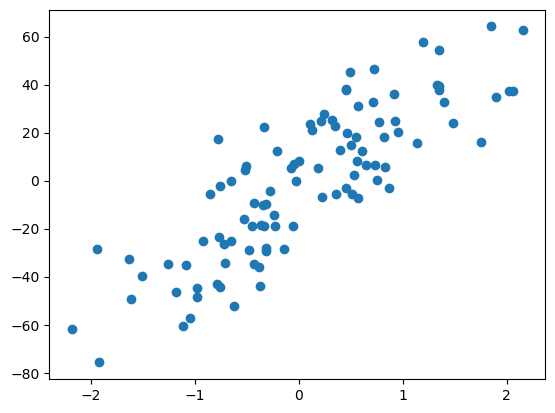

In [3]:
plt.scatter(X,y)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
print(lr.coef_)
print(lr.intercept_)

[28.67684216]
-2.088699766134101


In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.71337703667083

In [10]:
rdg = Ridge(alpha=10)

In [11]:
rdg.fit(X_train,y_train)

Ridge(alpha=10)

In [12]:
print(rdg.coef_)
print(rdg.intercept_)

[24.82106414]
-2.2985097444611213


In [13]:
y_pred1 = rdg.predict(X_test)

In [14]:
r2_score(y_test,y_pred1)

0.7292303148983129

In [15]:
rdg1 = Ridge(alpha=100)

In [16]:
rdg1.fit(X_train,y_train)

Ridge(alpha=100)

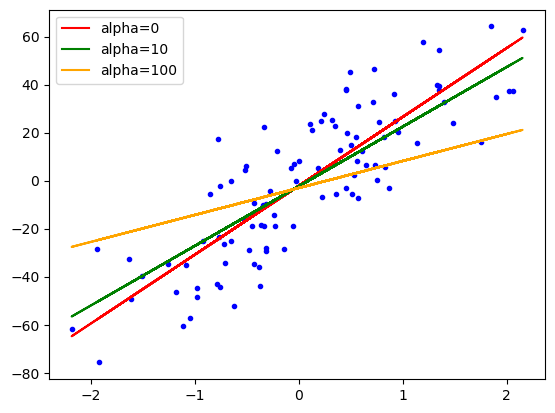

In [17]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rdg.predict(X),color='green',label='alpha=10')
plt.plot(X,rdg1.predict(X),color='orange',label='alpha=100')
plt.legend()
plt.show()

# Ridge Regression from Scretch for 2D

In [18]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    
    def fit(self,X_train,y_train):
    
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()) 
            
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        
        print(self.m, self.b)
            
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [19]:
reg = MeraRidge(alpha=100)

In [20]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


# Ridge Regression From Scretch for ND

In [21]:
from sklearn.datasets import load_diabetes

In [22]:
X,y = load_diabetes(return_X_y=True)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [24]:
from sklearn.linear_model import Ridge

In [25]:
reg = Ridge(alpha=0.1, solver='cholesky')

In [26]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [27]:
y_pred = reg.predict(X_test)

In [28]:
r2_score(y_test,y_pred)

0.46931288533098026

In [29]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [30]:
class MeraReg:
    
    def __init__(self,alpha = 0.1):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        betas = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [31]:
rg = MeraReg()

In [32]:
rg.fit(X_train,y_train)

In [33]:
rg.coef_

array([  44.02063391, -241.69329987,  452.98665299,  332.04420177,
        -76.33686744,  -68.52143809, -164.98809083,  149.96908118,
        431.61347417,   58.51862681])

In [34]:
rg.intercept_

150.89053425602813

In [35]:
y_pred5 = rg.predict(X_test)

In [36]:
r2_score(y_test,y_pred5)

0.4693128853309805